<a href="https://colab.research.google.com/github/erlonL/testes-inferencia/blob/main/Zscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X: média amostral

n: número de valores da amostra

alpha: nivel de significância

sigma: desvio padrão

mu: média populacional

H0: a amostra provém de uma população com determinada média (mu = mu0)

H1: contesta a hipótese nula (mu != mu0)

In [14]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Teste Z de Hipótese p/ Média Populacional Unilateral

In [8]:
def generate_normal_random_values(count, min_val, max_val):
    mn = (max_val - min_val) / 2

    X = np.random.normal(loc=mn, scale=mn/3, size=count)
    X = np.clip(X, min_val, max_val)

    return X

In [9]:
def media_amostral(numero):
    numero_arredondado_baixo = math.floor(numero)
    numero_arredondado_cima = math.ceil(numero)

    media = random.uniform(numero_arredondado_baixo, numero_arredondado_cima)

    return media

In [10]:
def treat_values(values):
    values = [round(x, ndigits=0) for x in values]
    values = np.array(values)
    return values

In [11]:
def statistics(values):
    # Informações importantes sobre o conjunto de valores

    media = np.mean(values)
    var = np.var(values)
    dp = np.std(values)
    cont = len(values)

    return media, var, dp, cont

In [25]:
def Zscore(X, n, alpha, mu0, sigma, teste):
  Z = (X - mu0) / (sigma/(n)**(1/2))

  if teste == 'UNILATERAL':

    ppf = stats.norm.ppf(alpha)

    if Z < ppf:
      #print("Com 95% de confiança, temos provas para rejeitar H0.")
      return False
    else:
      #print("Com 95% de confiança, não temos provas para rejeitar H0")
      return True

  elif teste == 'BILATERAL':
    ppf = stats.norm.ppf(alpha/2)

    if Z < ppf or Z > -ppf:
      #print("Com 95% de confiança, temos provas para rejeitar H0.")
      return False
    else:
      #print("Com 95% de confiança, não temos provas para rejeitar H0")
      return True

In [ ]:
rdf = pd.DataFrame(columns=['Amostra', 'n', 'Média', 'Variância', 'Desvio Padrão', 'Resultado', 'Resultado_bib', 'Resultado_final'])
is_accepted = []
is_accepted_test = []

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for h in range(4):
  is_accepted_child = []
  is_accepted_test_child = []
  for j in range(4):
    valores = generate_normal_random_values(30, 10, 100)
    valores = treat_values(valores)
    mu, var, dp, cont = statistics(valores)
    media = media_amostral(mu)

    is_accepted_child.append(Zscore(media, cont, 0.05, mu, dp))
    if(is_accepted_child[j]):
      axs[h][j].set_title('Amostra provem de uma população com media ')
    else:
      axs[h][j].set_title('Amostra não vem de uma população com media ')

    axs[h][j].set_xlabel('Valor')
    axs[h][j].set_ylabel('Frequência')
    axs[h][j].grid(True)
    sns.histplot(valores, ax=axs[h][j])

    linha = {}
    linha['Amostra'] = f'{h+1}-{j+1}'
    linha['n'] = cont
    linha['Média'] = media
    linha['Variância'] = var
    linha['Desvio Padrão'] = dp
    linha['Resultado'] = is_accepted_child[j]
    linha['Resultado_bib'] = is_accepted_test_child[j]
    linha['Resultado_final'] = is_accepted_child[j] == is_accepted_test_child[j]

    rdf = pd.concat([rdf, pd.DataFrame([linha])])

  is_accepted.append(is_accepted_child)
  is_accepted_test.append(is_accepted_test_child)

plt.show()

In [ ]:
X = 10
n = 100
alpha = 0.05
mu0 = 5
sigma = 2
amostra = np.random.normal(loc=mu0, scale=sigma, size=n)

In [26]:
Zscore(X, n, alpha, mu0, sigma, 'UNILATERAL')

True

(array([ 2.,  4.,  9., 16., 17., 21., 11., 10.,  9.,  1.]),
 array([0.61191403, 1.49020305, 2.36849206, 3.24678108, 4.1250701 ,
        5.00335911, 5.88164813, 6.75993714, 7.63822616, 8.51651517,
        9.39480419]),
 <BarContainer object of 10 artists>)

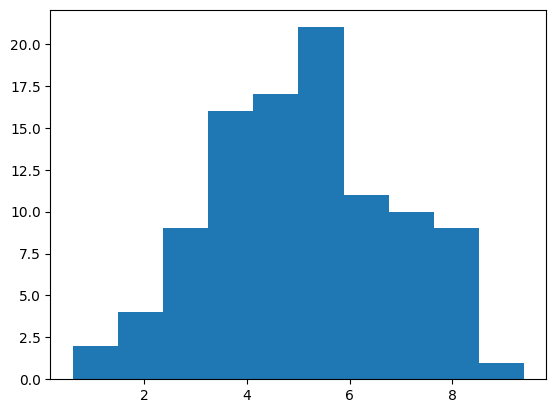

In [23]:
plt.hist(amostra)

## Teste Z de Hipótese p/ Média Populacional Bilateral

In [27]:
Zscore(X, n, alpha, mu0, sigma, 'BILATERAL')

False

## Teste t-student de Hipótese p/ Média (sigma desconhecido)

In [28]:
import pandas as pd
from scipy.stats import t as t_student

tabela_t_student = pd.DataFrame(
    [],
    index=[i for i in range(1, 31)],
    columns = [i / 100 for i in range(10, 0, -1)]
)

for index in tabela_t_student.index:
    for column in tabela_t_student.columns:
        tabela_t_student.loc[index, column] = t_student.ppf(1 - float(column) / 2, index)

index=[('Graus de Liberdade (n - 1)', i) for i in range(1, 31)]
tabela_t_student.index = pd.MultiIndex.from_tuples(index)

columns = [("{0:0.3f}".format(i / 100), "{0:0.3f}".format((i / 100) / 2)) for i in range(10, 0, -1)]
tabela_t_student.columns = pd.MultiIndex.from_tuples(columns)

tabela_t_student.rename_axis(['Unicaudal', 'Bicaudal'], axis=1, inplace = True)

In [29]:
def t_student(mu0, n, X, S, alpha, teste):
  Tcalc = (X - mu0) / (S / (n)**(1/2) )
  Tc = tabela_t_student[alpha].iloc[(n-1)-1][0]

  if teste == 'UNILATERAL':

    if Tcalc < Tc:
      print("Não temos evidências para rejeitar H0")
      return True
    else:
      print("temos evidências para rejeitar H0")
      return False

  elif teste == 'BILATERAL':

    if Tcalc > -Tc or Tcalc < Tc:
      print("Não temos evidências para rejeitar H0")
      return True
    else:
      print("Temos evidências para rejeitar H0")
      return False

In [30]:
# exemplo

mu0 = 18
n = 25
X = 16.808
S = 2.733
alpha = '0.010'

In [31]:
t_student(mu0, n, X, S, alpha, 'UNILATERAL')

Não temos evidências para rejeitar H0


True